In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
import math

In [2]:
print("This is Problem 1")
EN,WM,U = np.loadtxt('Wmass_data.txt', unpack=True)
print(WM)
print(U)
print(len(WM))

This is Problem 1
[80.37  80.375 80.387 80.336 80.415 80.27  80.44  80.483 80.433]
[0.018 0.023 0.019 0.067 0.052 0.055 0.051 0.084 0.079]
9


In [3]:
w = 1/U**2
mean_w = np.sum(WM/U**2)/np.sum(1/U**2)
mean_U = np.sqrt(1/np.sum(1/U**2))
print(mean_w,"this is mean")
print(mean_U,"this is error")
#sum = 0
#for i in range(0,len(WM)):
#    sum = sum + WM[i];
#print(str(sum))
print("this is mean w",mean_w, "+-",mean_U)

80.37914612783634 this is mean
0.010338187803490969 this is error
this is mean w 80.37914612783634 +- 0.010338187803490969


In [4]:
print(mean_w,"this is the weighted mean")
print(mean_U,"this is the uncertainty")
print(mean_w, "+-", mean_U)
print("the bold faced from the article is 80.379 +- 0.012")
print("our data is close to the article")

80.37914612783634 this is the weighted mean
0.010338187803490969 this is the uncertainty
80.37914612783634 +- 0.010338187803490969
the bold faced from the article is 80.379 +- 0.012
our data is close to the article


In [5]:
def fun_WM(x,y):
    return y
poW, pou = curve_fit(fun_WM,EN,WM, sigma=U,absolute_sigma=True)
print(poW)
print(pou)
shape_error = pou[0]**0.5
print("fit of mass is ",poW[0],'+-',shape_error)

[80.37914613]
[[0.00010688]]
fit of mass is  80.37914612783638 +- [0.01033819]


In [6]:
Fit1_chisq = np.sum( (WM - mean_w)**2/(U**2))
dof = len(EN) - len(poW) - 1
print(len(poW))
Fit1_pvalue = sf.gammaincc(len(EN)/2.0, Fit1_chisq/2.0)

print('Fit 1 results:\n')
print(' chi2 = ',Fit1_chisq,'\n dof = ', dof, '\n reduced chi2 = ', Fit1_chisq/len(EN), '\n p-value = ',Fit1_pvalue)
print("based on the p value the data is consistent  ")

1
Fit 1 results:

 chi2 =  8.706836513332618 
 dof =  7 
 reduced chi2 =  0.9674262792591798 
 p-value =  0.46476397232706534
based on the p value the data is consistent  


In [7]:
wmfit = np.repeat(poW[0],len(WM))
print(wmfit[0])


80.37914612783638


80.37914612783638
the mean i had was 80.37914612783634 and the parameter is greater then p0


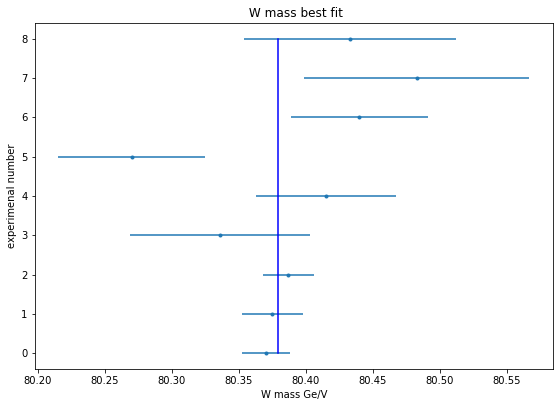

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.15,0.1,1.2,1.2])
axes.errorbar(WM, EN, xerr = U, fmt='.')
axes.plot(wmfit,EN,"b-",label = 'bestfit')
axes.set_xlabel('W mass Ge/V')
axes.set_ylabel('experimenal number')
axes.set_title(" W mass best fit")
#plt.axhline(x=80.30, color='r', linestyle='-')
#plt.axhline(y=mean, color='b', linestyle='-')
print(wmfit[0])
print("the mean i had was",mean_w, "and the parameter is greater then p0")

In [9]:
print("the p0 value, is less then the one calculated before")

the p0 value, is less then the one calculated before


In [10]:
print("This is Problem 2")
ExN,R,UN = np.loadtxt('proton_radius_data.txt', unpack=True)
print(R)
print(UN)

This is Problem 2
[0.8335  0.895   0.916   0.8775  0.875   0.879   0.912   0.871   0.84148
 0.8768  0.844   0.897   0.875   0.895   0.84087]
[0.0095  0.0198  0.024   0.0051  0.01    0.00781 0.0114  0.00949 0.00067
 0.0069  0.006   0.018   0.0068  0.0164  0.00039]


In [11]:
rad = 1/UN**2
meanr = np.sum(R/UN**2)/np.sum(1/UN**2)
mean_UN = np.sqrt(1/np.sum(1/UN**2))
print(meanr,"this is mean")
print(mean_UN,"this is error")
print(meanr,"+-",mean_UN)
print("the value from the PDG is 0.8751+- 0.0061")
print("our value is slightly lower then the PDG value")

0.8416225242550588 this is mean
0.0003337320304863616 this is error
0.8416225242550588 +- 0.0003337320304863616
the value from the PDG is 0.8751+- 0.0061
our value is slightly lower then the PDG value


In [12]:
def fun_R(a,b):
    return b
por, pour = curve_fit(fun_R,ExN,R, sigma=UN,absolute_sigma=True)
print(por)
print(pour)
shape_error = pour[0]**0.5
print("fit of mass is ",por[0],'+-',shape_error)

[0.84162252]
[[1.11377068e-07]]
fit of mass is  0.8416225241593092 +- [0.00033373]


In [13]:
Fit1_chisr = np.sum( (R - meanr)**2/(UN**2))
dofr = len(ExN) - len(por) - 1
print(len(por))
Fit1_pvaluer = sf.gammaincc(len(ExN)/2.0, Fit1_chisr/2.0)

print('Fit 1 results:\n')
print(' chi2 = ',Fit1_chisr,'\n dof = ', dofr, '\n reduced chi2 = ', Fit1_chisr/len(ExN), '\n p-value = ',Fit1_pvaluer)
print("based on the p value the data is not consistent, I see the fuss is about wide discrepancy  ")

1
Fit 1 results:

 chi2 =  222.8986182713527 
 dof =  13 
 reduced chi2 =  14.859907884756845 
 p-value =  4.5487995265920645e-39
based on the p value the data is not consistent, I see the fuss is about wide discrepancy  


In [14]:
rfit = np.repeat(por[0],len(R))
print(rfit[0])

0.8416225241593092


In [15]:
#fig = plt.figure()
#axes = fig.add_axes([0.2,0.2,1.2,1.2])
#axes.errorbar(ExN, R, yerr = UN, fmt='.')
#axes.set_xlabel('experimental number')
#axes.set_ylabel('R in fm')
#plt.axhline(y=0.85, color='r', linestyle='-')
#plt.axhline(y=mean, color='b', linestyle='-')
#print("the mean i had was",meanr, "and the parameter is less then that")

0.8416225241593092
the mean i had was 0.8416225242550588 and the parameter is close to p0 value chosen


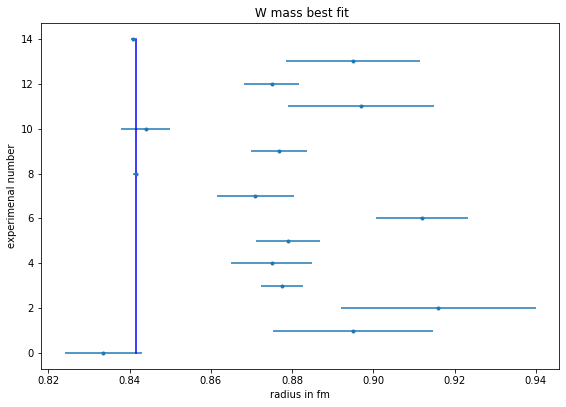

In [16]:
fig = plt.figure()
axes = fig.add_axes([0.15,0.1,1.2,1.2])
axes.errorbar(R, ExN, xerr = UN, fmt='.')
axes.plot(rfit,ExN,"b-",label = 'bestfit')
axes.set_xlabel('radius in fm')
axes.set_ylabel('experimenal number')
axes.set_title(" W mass best fit")
#plt.axhline(x=80.30, color='r', linestyle='-')
#plt.axhline(y=mean, color='b', linestyle='-')
print(rfit[0])
print("the mean i had was",meanr, "and the parameter is close to p0 value chosen")

In [17]:
print("Problem 3")
energy,numpa,Upa = np.loadtxt('Ep_data.txt', unpack=True)
print(energy)
print(len(energy))
#print(numpa)
#print(Upa)

Problem 3
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83
 0.85 0.87 0.89 0.91 0.93 0.95 0.97 0.99 1.01 1.03 1.05 1.07 1.09 1.11
 1.13 1.15 1.17 1.19 1.21 1.23 1.25 1.27 1.29 1.31 1.33 1.35 1.37 1.39
 1.41 1.43 1.45 1.47 1.49 1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68
 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.96
 1.98 2.  ]
100


Text(0, 0.5, 'number of particles')

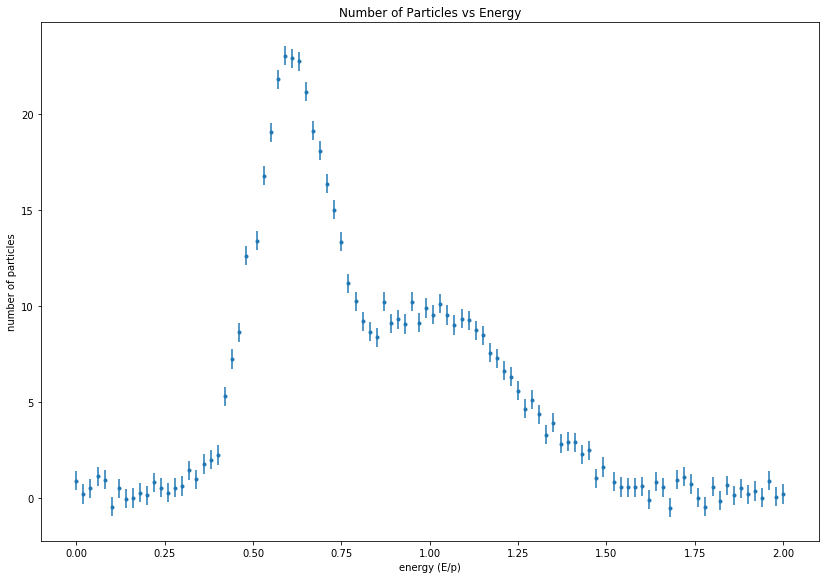

In [18]:
fig = plt.figure()
axes = fig.add_axes([0.2,0.2,1.8,1.8])
axes.set_title('Number of Particles vs Energy')
axes.errorbar(energy, numpa, yerr = Upa, fmt='.')
axes.set_xlabel('energy (E/p)')
axes.set_ylabel('number of particles')

In [19]:
print("e/p at 1.0 is electrons and e/p at 0.6 are pions")
print("we want to treat electrons as signal and pions as backround")

e/p at 1.0 is electrons and e/p at 0.6 are pions
we want to treat electrons as signal and pions as backround


In [20]:
e= math.exp(1)
print(e)

2.718281828459045


In [21]:
#G1= p1*e**((-(energy-p2)**2)/(2*p3))
#print(G1)
#plt.plot(energy,G1)
plt.show()

In [22]:
#def efunction(fun_Gsum,energy):
#    return energy*a
#pp, po = curve_fit(efunction, energy, numpa, sigma=Upa, absolute_sigma=True)
#print(pp)
#print('\n')
#print(po)

In [23]:
"""e_chisq = np.sum( (Upa - efunction(energy,*pp))**2/Upa**2)
edof = LN - len(pp) - 1

Rit1_evalue = sf.gammaincc(edof/2.0, e_chisq/2.0)

print('Fit 1 results:\n')
print(' chi2 = ',e_chisq,'\n dof = ', edof, '\n reduced chi2 = ', e_chisq/dof, '\n p-value = ',Rit1_evalue)
print("the p value is coming out as 0 but that because the function is wrong")"""

'e_chisq = np.sum( (Upa - efunction(energy,*pp))**2/Upa**2)\nedof = LN - len(pp) - 1\n\nRit1_evalue = sf.gammaincc(edof/2.0, e_chisq/2.0)\n\nprint(\'Fit 1 results:\n\')\nprint(\' chi2 = \',e_chisq,\'\n dof = \', edof, \'\n reduced chi2 = \', e_chisq/dof, \'\n p-value = \',Rit1_evalue)\nprint("the p value is coming out as 0 but that because the function is wrong")'

In [24]:
#G2= A2* exp(x-mean)**2/sigma2
#G1= A1* exp(x-mean)**2/sigma1
#def G1(A1,mean1,sigma1):
    
def fun_Gsum(A1,mean1,sigma1,A2,mean2,sigma2):
    return A1* e**((x-mean1)**2/sigma1) + A2* e**((x-mean2)**2/sigma2)

def fun_G1(A1,mean1,sigma1):
    return A1* e**((x-mean1)**2/sigma1)


In [25]:
#G2= p4*e**((-(x-p5)**2)/(2*p6))

In [26]:

def fun_G1(energy,A1,mean1,sigma1):
    return A1* np.exp(-(energy-mean1)**2/sigma1)

def fun_Gsum(energy,A1,mean1,sigma1,A2,mean2,sigma2):
    return A1* np.exp(-(energy-mean1)**2/sigma1) + A2* e**(-(energy-mean2)**2/sigma2)

pp, po = curve_fit(fun_Gsum, energy, numpa, sigma=Upa, absolute_sigma=True)
print(pp)
print('\n')
print(po)
e_chisq = np.sum((numpa - fun_Gsum(energy,*pp))**2/Upa**2)
edof = len(energy) - len(pp) - 1
Rit1_evalue = sf.gammaincc(edof/2.0, e_chisq/2.0)

print('Fit 1 results:\n')
print(' chi2 = ',e_chisq,'\n dof = ', edof, '\n reduced chi2 = ', e_chisq/dof, '\n p-value = ',Rit1_evalue)
print("based on these statistics this is an acceptable fit")

[20.20935641  0.60123036  0.02119171  9.74415327  1.00366103  0.11866808]


[[ 1.34654001e-01  2.68234849e-04  1.16735299e-04  6.72736783e-03
   2.44127935e-03 -2.28878076e-03]
 [ 2.68234849e-04  2.44553825e-06  5.60841847e-07 -3.19657847e-05
   8.14662918e-06 -5.82771997e-06]
 [ 1.16735299e-04  5.60841847e-07  5.96159918e-07 -9.43049348e-06
   4.92764244e-06 -3.94377308e-06]
 [ 6.72736783e-03 -3.19657847e-05 -9.43049348e-06  1.89693632e-02
   5.67955650e-06 -3.40507766e-04]
 [ 2.44127935e-03  8.14662918e-06  4.92764244e-06  5.67955650e-06
   7.59694899e-05 -5.25936096e-05]
 [-2.28878076e-03 -5.82771997e-06 -3.94377308e-06 -3.40507766e-04
  -5.25936096e-05  6.06586624e-05]]
Fit 1 results:

 chi2 =  108.4209411205048 
 dof =  93 
 reduced chi2 =  15.48870587435783 
 p-value =  0.1309498054808455
based on these statistics this is an acceptable fit


C:\Users\shwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


ValueError: The lengths of the data (100) and the error 1 do not match

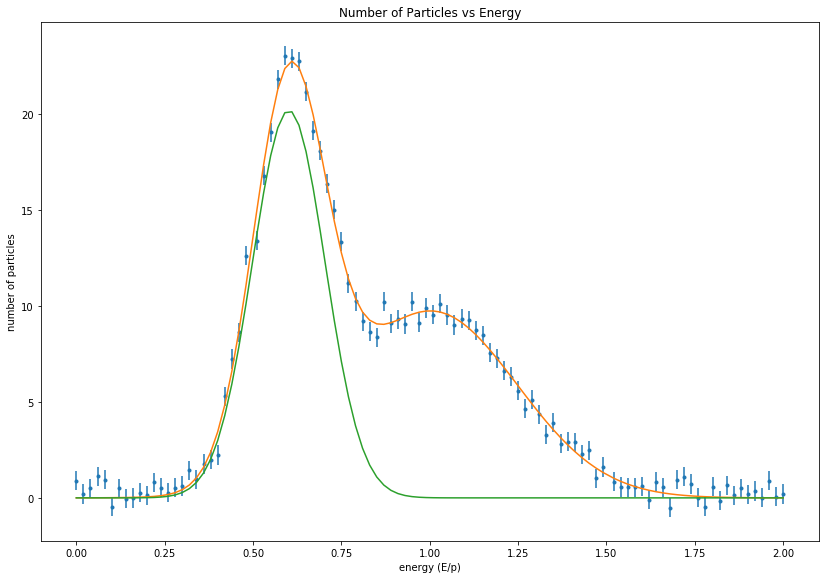

In [27]:
fig = plt.figure()
axes = fig.add_axes([0.2,0.2,1.8,1.8])
axes.set_title('Number of Particles vs Energy')
axes.set_xlabel('energy (E/p)')
axes.set_ylabel('number of particles')
axes.errorbar(energy, numpa, yerr = Upa, fmt='.')
axes.errorbar(energy,fun_Gsum(energy,*pp), label = "gausian total")
axes.errorbar(energy,fun_G1(energy,pp[0],pp[1],pp[2]),'g-', label = "pion")
axes.errorbar(energy,fun_G1(energy,pp[3],pp[4],pp[5]),'o-', label = "electron")
axes.legend()

In [28]:
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
ti = 0.0
tf = 2.0
ptotal= np.array(integrate.quad(fun_G1,ti,tf,args=(pp[0],pp[1],pp[2])))
etotal= np.array(integrate.quad(fun_G1,ti,tf,args=(pp[3],pp[4],pp[5])))



In [29]:
spaced = np.linspace(0.3,0.8,10)
psigs= np.zeros( (len(spaced),2) )
esigs= np.zeros( (len(spaced),2) )

In [30]:
for n in range(0,len(spaced)):
    esigs[n] = integrate.quad(fun_G1,spaced[n],tf,args=(pp[3],pp[4],pp[5]))
    psigs[n] = integrate.quad(fun_G1,spaced[n],tf,args=(pp[0],pp[1],pp[2]))

In [31]:
e_ratio= (esigs/etotal) *100
p_ratio= (psigs/ptotal) * 100
print(e_ratio)
print()
print(p_ratio)

[[9.98085019e+01 5.64454572e-01]
 [9.96119683e+01 2.86104934e-01]
 [9.92523451e+01 2.97699842e-01]
 [9.86275127e+01 1.30377093e-01]
 [9.75966878e+01 8.72818981e-02]
 [9.59819133e+01 7.06359240e+04]
 [9.35800696e+01 8.36897879e-02]
 [9.01878520e+01 8.06560867e-02]
 [8.56387161e+01 6.52554905e+04]
 [7.98460228e+01 1.32301596e+04]]

[[9.98285343e+01 2.55089088e+01]
 [9.91499155e+01 9.10852944e+00]
 [9.67623704e+01 3.06685977e+00]
 [9.04436706e+01 7.55763666e-01]
 [7.78621191e+01 1.48060547e-01]
 [5.90113187e+01 3.31730899e-02]
 [3.77568676e+01 5.13651998e-03]
 [1.97223253e+01 7.66234761e-04]
 [8.20687425e+00 8.95941921e+01]
 [2.67416003e+00 8.14311356e+01]]


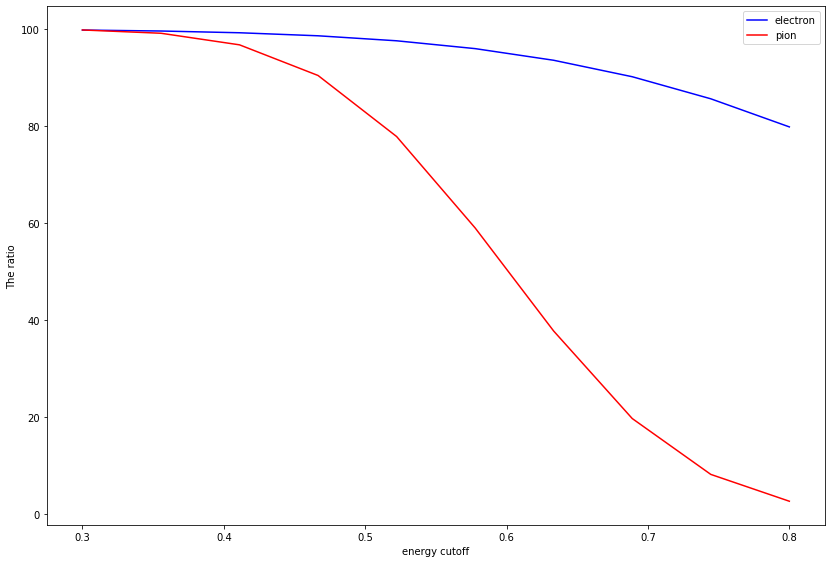

In [32]:
fig = plt.figure()
axes = fig.add_axes([0.2,0.2,1.8,1.8])
axes.set_xlabel('energy cutoff')
axes.set_ylabel('The ratio')
axes.plot(spaced,e_ratio[:,0],'b', label = 'electron')
axes.plot(spaced,p_ratio[:,0],'r', label = 'pion')
axes.legend()

In [33]:
#i see energy at 0.7, which is 7th term when electron is 90%
e90= e_ratio[7]
p90= p_ratio[7]
print("electron is at",e90,"this is 90.19%")
print("pion is at ",p90,"this is 19.72%")

electron is at [9.01878520e+01 8.06560867e-02] this is 90.19%
pion is at  [1.97223253e+01 7.66234761e-04] this is 19.72%
